# Análisis de Series Temporales

In [77]:
from dotenv import load_dotenv
import os

# Cargar automáticamente las variables del archivo .env
load_dotenv()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_RAW = os.getenv('DATA_RAW')
DATA_PREPROCESSED = os.getenv('DATA_PROCESSED')
df = pd.read_csv(os.path.join('..',DATA_RAW, "dataframe_merged.csv"), sep=";")

In [78]:
df.head()

Ajuste Fecha Dia Semana  Sabor 1  Sabor 2  Sabor 3  Sabor 4  Sabor 5  \
0   2022-01-01      Lunes     5.36    12.45     5.47     5.03      NaN   
1   2022-01-02     Jueves    22.92      NaN    26.50      NaN      NaN   
2   2022-01-03     Jueves    34.39      NaN    35.99      NaN      NaN   
3   2022-01-04    Domingo    10.66      NaN    12.38      NaN      NaN   
4   2022-01-05     Martes    11.42      NaN    23.53      NaN      NaN   

   Sabor 6  Sabor 7  Sabor 8  ...  humidity  wind_speed  wind_deg  wind_gust  \
0    12.41    11.60     5.60  ...      64.0       3.270      86.0       4.47   
1    32.50     5.08     5.12  ...      80.0       2.570      60.0        NaN   
2    32.64    20.10    20.37  ...      67.0       2.060     150.0       0.89   
3    21.97      NaN    10.21  ...      69.0       4.955     198.5       2.68   
4    18.89     5.05     5.07  ...      53.5       4.885     125.0       3.13   

   rain_1h  clouds_all  weather_main  weather_description  Estacion  EsFeriado  
0     0.51        40.0        Clouds         sky is clear    Verano       True  
1     0.51         0.5         Clear         sky is clear    Verano      False  
2     3.30         0.0         Clear         sky is clear    Verano      False  
3     1.90         0.0         Clear         sky is clear    Verano      False  
4      NaN         0.0         Clear         sky is clear    Verano      False  

[5 rows x 100 columns]

In [79]:
df['Ajuste Fecha'] = pd.to_datetime(df['Ajuste Fecha'])
df['year'] = df['Ajuste Fecha'].dt.year

In [80]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')  # Puede necesitar ajustes según tu SO
df['Dia Semana'] = df['Ajuste Fecha'].apply(lambda x: x.strftime('%A'))  # Resultado: 'jueves'


In [81]:
df['Dia Semana'] = df['Dia Semana'].str.encode('latin1').str.decode('utf-8')

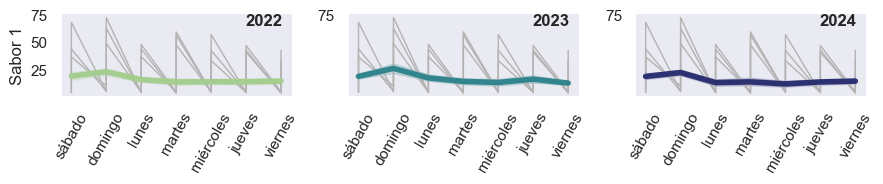

In [82]:

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="Dia Semana", y="Sabor 1", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df, x="Dia Semana", y="Sabor 1", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

    # Reduce the frequency of the x axis ticks
    ax.tick_params(axis='x', rotation=60)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Sabor 1")
g.tight_layout()

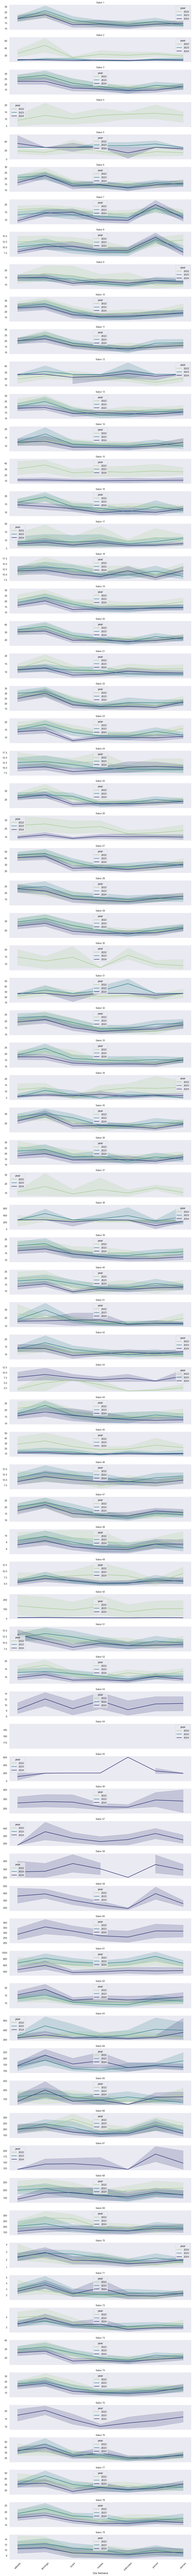

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

# Lista de sabores
sabores = [f"Sabor {i}" for i in range(1, 80)]

# Crear figura con 79 subplots (uno por sabor)
fig, axes = plt.subplots(len(sabores), 1, figsize=(12, len(sabores) * 2), sharex=True)

# Graficar cada sabor en su subplot
for i, sabor in enumerate(sabores):
    ax = axes[i]
    
    sns.lineplot(data=df, x="Dia Semana", y=sabor, hue="year", palette="crest", ax=ax, linewidth=2)
    
    ax.set_title(sabor, fontsize=10)
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

    if i != len(sabores) - 1:
        ax.set_xlabel("")

# Ajustar espaciado
plt.tight_layout()
plt.show()


Por estación

In [84]:
def obtener_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Otoño"
    elif mes in [6, 7, 8]:
        return "Invierno"
    elif mes in [9, 10, 11]:
        return "Primavera"


In [85]:
df["Estacion"] = df["Ajuste Fecha"].apply(obtener_estacion)

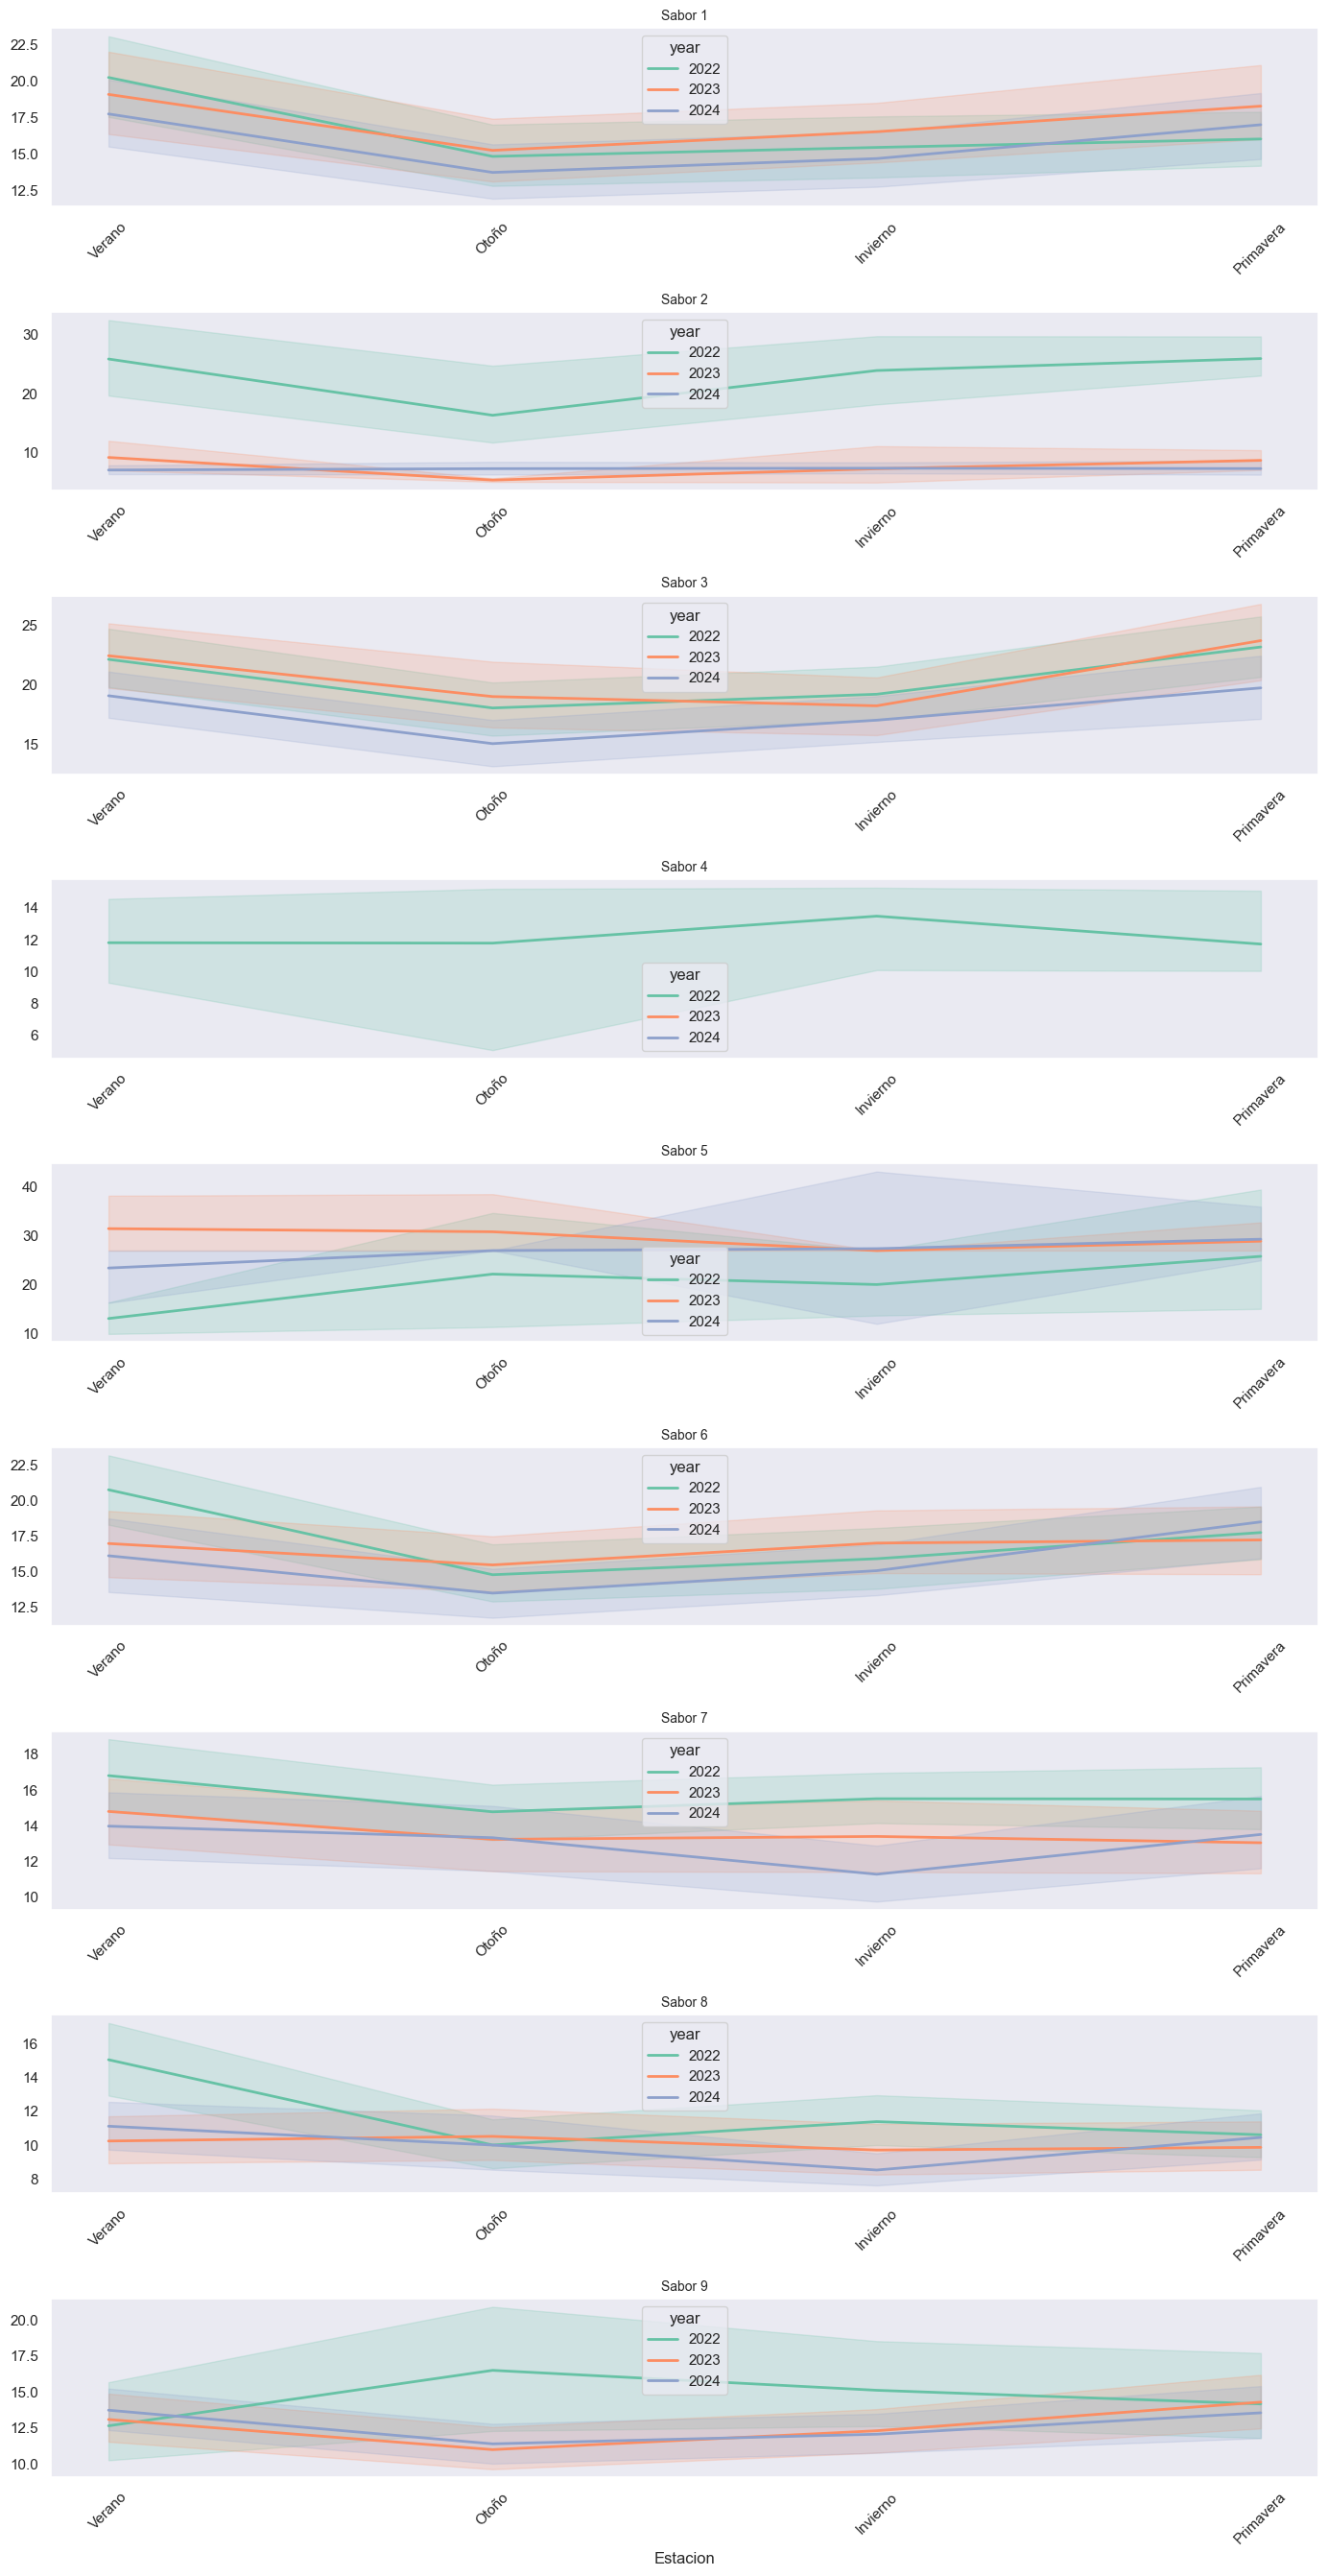

In [86]:
sns.set_theme(style="dark")
sabores = [f"Sabor {i}" for i in range(1, 10)]

# Figura con un gráfico por sabor
fig, axes = plt.subplots(len(sabores), 1, figsize=(14, len(sabores) * 3), sharex=False)

for i, sabor in enumerate(sabores):
    ax = axes[i]
    
    sns.lineplot(
        data=df,
        x="Estacion", y=sabor, hue="year",
        ax=ax, palette="Set2", linewidth=2
    )
    
    ax.set_title(sabor, fontsize=10)
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    
    if i != len(sabores) - 1:
        ax.set_xlabel("")

plt.tight_layout()
plt.show()


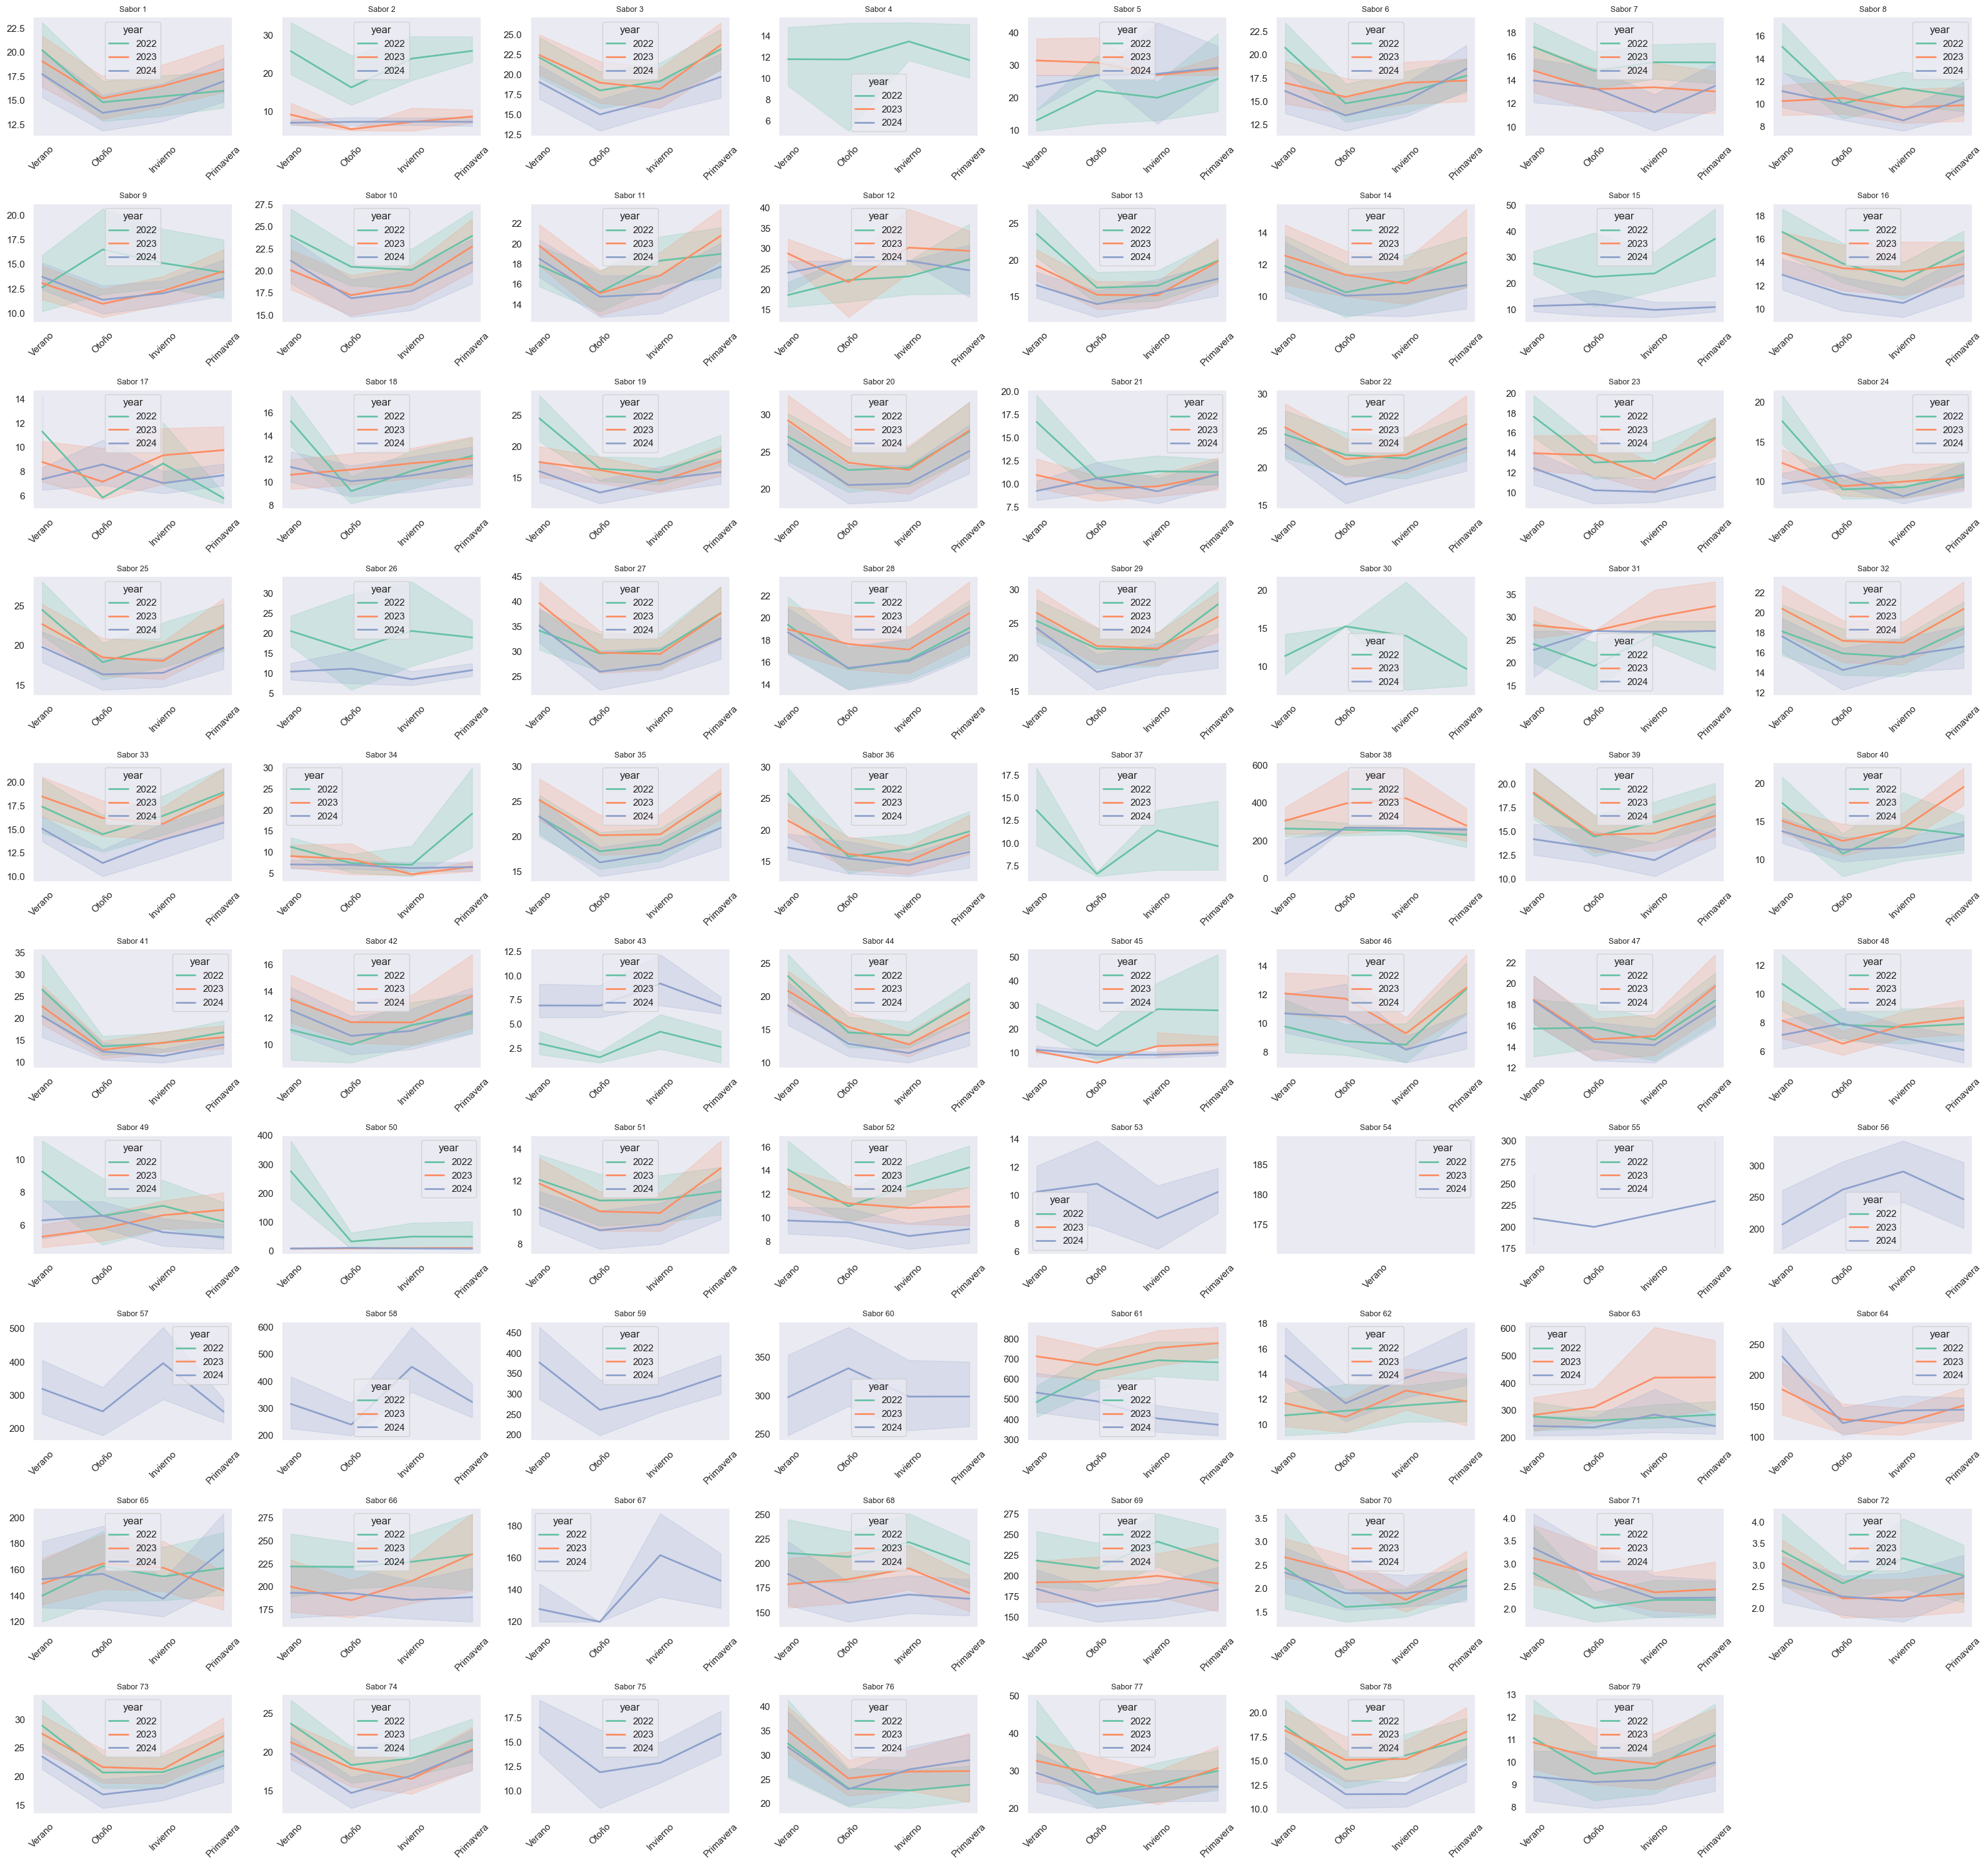

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_theme(style="dark")

sabores = [f"Sabor {i}" for i in range(1, 80)]  # podés extender hasta 80 si querés

# Definimos cantidad de columnas (mínimo 8) y calculamos las filas necesarias
ncols = 8
nrows = math.ceil(len(sabores) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 3), sharex=False)

# Aplanamos el array de ejes para iterar más fácilmente
axes = axes.flatten()

for i, sabor in enumerate(sabores):
    ax = axes[i]
    
    sns.lineplot(
        data=df,
        x="Estacion", y=sabor, hue="year",
        ax=ax, palette="Set2", linewidth=2
    )
    
    ax.set_title(sabor, fontsize=9)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Desactivamos ejes vacíos si sobran
for j in range(len(sabores), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Sabores a eliminar:
Sabor 4, Sabor 30, Sabor 37, Sabor 53, Sabor 54, Sabor 55, Sabor 56, Sabor 57, Sabor 58, Sabor 59, Sabor 60, Sabor 67, Sabor 75

Sabor con mayor venta en verano y primavera:
Sabor 1, Sabor 3, Sabor 6, Sabor 7, Sabor 8, Sabor 10, Sabor 11, Sabor 13, Sabor 14, Sabor 16, Sabor 19, Sabor 20, Sabor 21, Sabor 22, Sabor 23, Sabor 25, Sabor 27, Sabor 28, Sabor 29, Sabor 32, Sabor 33, Sabor 35, Sabor 36, Sabor 

<Axes: >

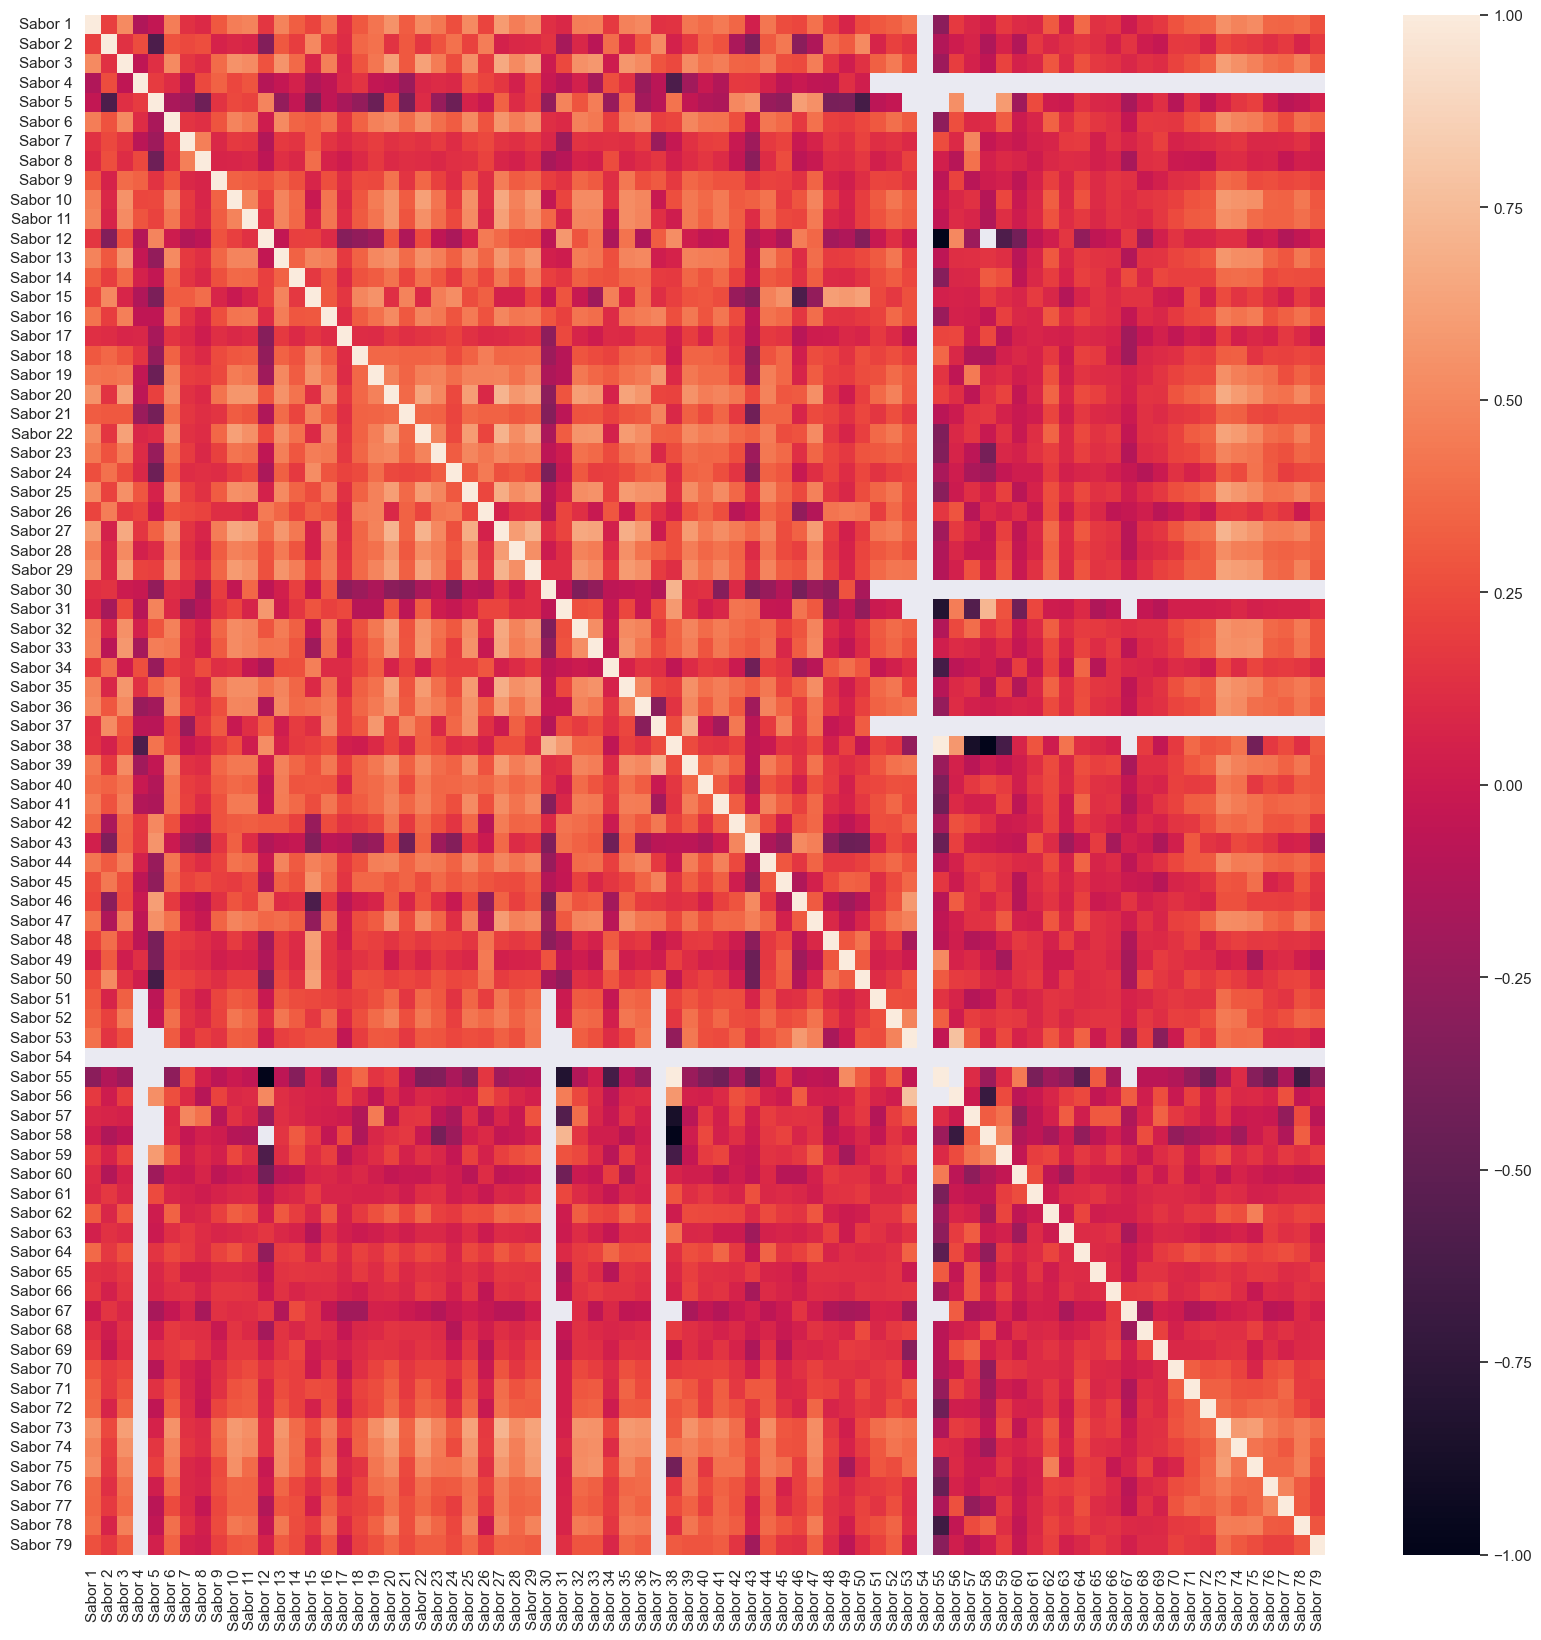

In [88]:
plt.figure(figsize=(20,20))
corr_matrix = df[[f'Sabor {i}' for i in range(1,80)]].corr(method='spearman')

sns.heatmap(corr_matrix)

In [89]:
from sklearn.preprocessing import StandardScaler

sabores = [f"Sabor {i}" for i in range(1, 80)]
df_scaled = df.copy()
df_scaled[sabores] = StandardScaler().fit_transform(df[sabores])

In [90]:
media_estacional = df_scaled.groupby(["Estacion", "year"])[sabores].mean().reset_index()


In [91]:
media_estacional


Estacion  year   Sabor 1   Sabor 2   Sabor 3   Sabor 4   Sabor 5  \
0    Invierno  2022 -0.110818  1.731457 -0.049413  0.274158 -0.349820   
1    Invierno  2023 -0.009921 -0.280910 -0.132294       NaN  0.211443   
2    Invierno  2024 -0.182487 -0.269648 -0.235356       NaN  0.243717   
3       Otoño  2022 -0.168585  0.814618 -0.147884 -0.034074 -0.176996   
4       Otoño  2023 -0.129745 -0.512600 -0.066130       NaN  0.522655   
5       Otoño  2024 -0.271609 -0.278741 -0.403600       NaN  0.211443   
6   Primavera  2022 -0.056559  1.976297  0.289285 -0.044953  0.116477   
7   Primavera  2023  0.154522 -0.108954  0.334850       NaN  0.367049   
8   Primavera  2024  0.034928 -0.277371 -0.003981       NaN  0.399707   
9      Verano  2022  0.338745  1.967497  0.200584 -0.029270 -0.911725   
10     Verano  2023  0.229949 -0.049300  0.226495       NaN  0.574524   
11     Verano  2024  0.104306 -0.306923 -0.060280       NaN -0.076717   

     Sabor 6   Sabor 7   Sabor 8  ...  Sabor 70  Sabor 71  Sabor 72  Sabor 73  \
0  -0.075255  0.161074  0.107739  ... -0.286120 -0.162216  0.233055 -0.134876   
1   0.035201 -0.093865 -0.146090  ... -0.236822 -0.087206 -0.169796 -0.097178   
2  -0.159729 -0.349362 -0.324200  ... -0.146150 -0.145501 -0.205859 -0.330640   
3  -0.188349  0.072577 -0.101001  ... -0.334038 -0.244647 -0.025027 -0.140927   
4  -0.119166 -0.113555 -0.023937  ...  0.132196  0.090598 -0.179430 -0.073377   
5  -0.318275 -0.102433 -0.101636  ... -0.146743  0.061708 -0.160396 -0.415660   
6   0.109739  0.159080 -0.009609  ...  0.031716 -0.163070  0.054717  0.127320   
7   0.057234 -0.136546 -0.121993  ...  0.182748 -0.056308 -0.129459  0.316325   
8   0.184949 -0.080360 -0.033139  ... -0.049944 -0.139475  0.042102 -0.055605   
9   0.411654  0.317218  0.660035  ...  0.192593  0.105174  0.308217  0.445394   
10  0.032142  0.075049 -0.065379  ...  0.339052  0.254766  0.179109  0.343790   
11 -0.054419 -0.024196  0.066835  ...  0.132063  0.355515  0.009202  0.057851   

    Sabor 74  Sabor 75  Sabor 76  Sabor 77  Sabor 78  Sabor 79  
0   0.003242       NaN -0.211776 -0.088670  0.016585 -0.062367  
1  -0.230597       NaN -0.034215 -0.140598 -0.026183 -0.034777  
2  -0.193526 -0.236165 -0.014279 -0.130259 -0.418940 -0.164948  
3  -0.072615       NaN -0.191334 -0.207200 -0.141783 -0.115220  
4  -0.107748       NaN -0.098530  0.027878 -0.036774  0.015164  
5  -0.391891 -0.351784 -0.199995 -0.210530 -0.420925 -0.182835  
6   0.211459       NaN -0.158264  0.072530  0.195349  0.201690  
7   0.104187       NaN -0.029378  0.107368  0.279872  0.114758  
8   0.088815  0.125383  0.073523 -0.119080 -0.084778 -0.021872  
9   0.400031       NaN  0.228997  0.486382  0.338981  0.176789  
10  0.186318       NaN  0.349048  0.193302  0.293672  0.140790  
11  0.056258  0.204743  0.196726  0.048693  0.038981 -0.138504  

[12 rows x 81 columns]

# Prueba con Sabor 1

In [92]:
df.head()

Ajuste Fecha Dia Semana  Sabor 1  Sabor 2  Sabor 3  Sabor 4  Sabor 5  \
0   2022-01-01     sábado     5.36    12.45     5.47     5.03      NaN   
1   2022-01-02    domingo    22.92      NaN    26.50      NaN      NaN   
2   2022-01-03      lunes    34.39      NaN    35.99      NaN      NaN   
3   2022-01-04     martes    10.66      NaN    12.38      NaN      NaN   
4   2022-01-05  miércoles    11.42      NaN    23.53      NaN      NaN   

   Sabor 6  Sabor 7  Sabor 8  ...  wind_speed  wind_deg  wind_gust  rain_1h  \
0    12.41    11.60     5.60  ...       3.270      86.0       4.47     0.51   
1    32.50     5.08     5.12  ...       2.570      60.0        NaN     0.51   
2    32.64    20.10    20.37  ...       2.060     150.0       0.89     3.30   
3    21.97      NaN    10.21  ...       4.955     198.5       2.68     1.90   
4    18.89     5.05     5.07  ...       4.885     125.0       3.13      NaN   

   clouds_all  weather_main  weather_description  Estacion  EsFeriado  year  
0        40.0        Clouds         sky is clear    Verano       True  2022  
1         0.5         Clear         sky is clear    Verano      False  2022  
2         0.0         Clear         sky is clear    Verano      False  2022  
3         0.0         Clear         sky is clear    Verano      False  2022  
4         0.0         Clear         sky is clear    Verano      False  2022  

[5 rows x 101 columns]

In [93]:
saboresAEliminar = list(df.iloc[:, 3:82].columns)

In [94]:

df_sabor1 = df.copy()
df_sabor1 = df_sabor1.drop(saboresAEliminar, axis = 1)

In [95]:
df_sabor1.drop(['Total Cantidad', 'dt_iso'], axis = 1, inplace=True)

In [96]:
#
# df_sabor1

X = df_sabor1.drop('Sabor 1', axis = 1)
y = df_sabor1['Sabor 1']

In [97]:
X['month'] = X['Ajuste Fecha'].dt.month
X['day'] = X['Ajuste Fecha'].dt.day

<Axes: >

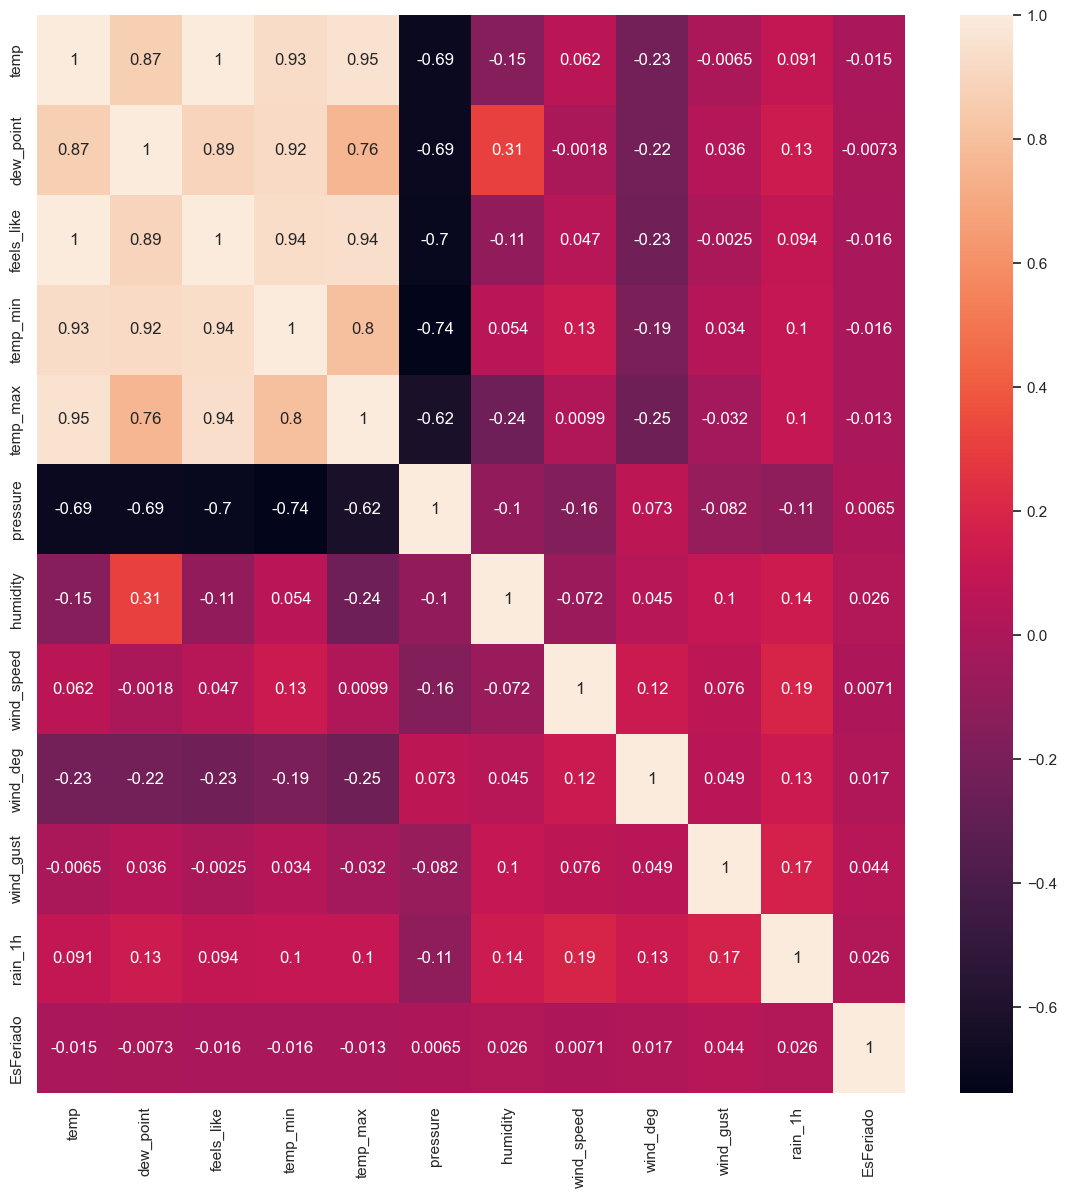

In [98]:
corr = df[['temp', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'EsFeriado',]].corr('spearman')

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot = True)

Eliminamos temperatura minima y maxima ya que tienen mucha correlacion con temp. También eliminamos feels_like y dew_point por la misma razón.

In [99]:
X

Ajuste Fecha Dia Semana       temp  dew_point  feels_like  temp_min  \
0      2022-01-01     sábado  25.950400  17.770800   26.337200     21.34   
1      2022-01-02    domingo  25.956667  19.792500   27.260417     17.88   
2      2022-01-03      lunes  28.290400  20.256400   29.739200     21.00   
3      2022-01-04     martes  26.944615  19.070385   27.760385     20.08   
4      2022-01-05  miércoles  24.381250  11.405833   23.972917     16.75   
...           ...        ...        ...        ...         ...       ...   
1091   2024-12-27    viernes  22.339167  13.905833   22.171667     13.34   
1092   2024-12-28     sábado  24.437500  13.805833   24.198750     15.00   
1093   2024-12-29    domingo  24.166250  13.640417   23.967500     13.75   
1094   2024-12-30      lunes  25.622917  15.534583   25.728333     18.00   
1095   2024-12-31     martes  27.576667  15.366667   27.458750     18.00   

      temp_max     pressure  humidity  wind_speed  ...  wind_gust  rain_1h  \
0        32.17  1002.680000      64.0       3.270  ...       4.47     0.51   
1        34.43  1004.541667      80.0       2.570  ...        NaN     0.51   
2        35.81  1006.760000      67.0       2.060  ...       0.89     3.30   
3        33.34  1006.153846      69.0       4.955  ...       2.68     1.90   
4        31.68  1013.750000      53.5       4.885  ...       3.13      NaN   
...        ...          ...       ...         ...  ...        ...      ...   
1091     30.42  1013.083333      58.5       2.150  ...       0.00      NaN   
1092     32.17  1016.666667      49.0       2.240  ...       0.00      NaN   
1093     32.64  1015.708333      52.5       4.470  ...       0.00      NaN   
1094     35.57  1011.958333      59.5       4.920  ...       0.00      NaN   
1095     37.23  1009.375000      53.5       4.035  ...       0.00      NaN   

      clouds_all  weather_main weather_description Estacion EsFeriado  year  \
0           40.0        Clouds        sky is clear   Verano      True  2022   
1            0.5         Clear        sky is clear   Verano     False  2022   
2            0.0         Clear        sky is clear   Verano     False  2022   
3            0.0         Clear        sky is clear   Verano     False  2022   
4            0.0         Clear        sky is clear   Verano     False  2022   
...          ...           ...                 ...      ...       ...   ...   
1091         0.0         Clear        sky is clear   Verano     False  2024   
1092         0.0         Clear        sky is clear   Verano     False  2024   
1093         0.0         Clear        sky is clear   Verano     False  2024   
1094         0.0         Clear        sky is clear   Verano     False  2024   
1095         0.0         Clear        sky is clear   Verano     False  2024   

      month  day  
0         1    1  
1         1    2  
2         1    3  
3         1    4  
4         1    5  
...     ...  ...  
1091     12   27  
1092     12   28  
1093     12   29  
1094     12   30  
1095     12   31  

[1096 rows x 21 columns]

In [100]:
import numpy as np
import pandas as pd

# Codificación cíclica de día de la semana
dias_map = {'lunes': 0, 'martes': 1, 'miércoles': 2, 'jueves': 3, 'viernes': 4, 'sábado': 5, 'domingo': 6}
X['dia_num'] = X['Dia Semana'].map(dias_map)

X['dia_sin'] = np.sin(2 * np.pi * X['dia_num'] / 7)
X['dia_cos'] = np.cos(2 * np.pi * X['dia_num'] / 7)

# Codificación cíclica del mes
X['mes_sin'] = np.sin(2 * np.pi * X['month'] / 12)
X['mes_cos'] = np.cos(2 * np.pi * X['month'] / 12)

# Codificación booleana de feriado
X['EsFeriado'] = X['EsFeriado'].astype(int)

# Codificación one-hot de la estación
X = pd.get_dummies(X, columns=['Estacion'], prefix='est')

# Codificación one-hot de clima (puede combinarse o reducirse)
X = pd.get_dummies(X, columns=['weather_main'], prefix='clima')

# OPCIONAL: si weather_description tiene demasiadas categorías, usá solo las top N
top_weather_desc = X['weather_description'].value_counts().nlargest(5).index
X['weather_description'] = X['weather_description'].apply(lambda x: x if x in top_weather_desc else 'Otro')
X = pd.get_dummies(X, columns=['weather_description'], prefix='desc')


In [101]:
X

Ajuste Fecha Dia Semana       temp  dew_point  feels_like  temp_min  \
0      2022-01-01     sábado  25.950400  17.770800   26.337200     21.34   
1      2022-01-02    domingo  25.956667  19.792500   27.260417     17.88   
2      2022-01-03      lunes  28.290400  20.256400   29.739200     21.00   
3      2022-01-04     martes  26.944615  19.070385   27.760385     20.08   
4      2022-01-05  miércoles  24.381250  11.405833   23.972917     16.75   
...           ...        ...        ...        ...         ...       ...   
1091   2024-12-27    viernes  22.339167  13.905833   22.171667     13.34   
1092   2024-12-28     sábado  24.437500  13.805833   24.198750     15.00   
1093   2024-12-29    domingo  24.166250  13.640417   23.967500     13.75   
1094   2024-12-30      lunes  25.622917  15.534583   25.728333     18.00   
1095   2024-12-31     martes  27.576667  15.366667   27.458750     18.00   

      temp_max     pressure  humidity  wind_speed  ...  clima_Clouds  \
0        32.17  1002.680000      64.0       3.270  ...          True   
1        34.43  1004.541667      80.0       2.570  ...         False   
2        35.81  1006.760000      67.0       2.060  ...         False   
3        33.34  1006.153846      69.0       4.955  ...         False   
4        31.68  1013.750000      53.5       4.885  ...         False   
...        ...          ...       ...         ...  ...           ...   
1091     30.42  1013.083333      58.5       2.150  ...         False   
1092     32.17  1016.666667      49.0       2.240  ...         False   
1093     32.64  1015.708333      52.5       4.470  ...         False   
1094     35.57  1011.958333      59.5       4.920  ...         False   
1095     37.23  1009.375000      53.5       4.035  ...         False   

      clima_Drizzle  clima_Mist  clima_Rain  desc_Otro  desc_broken clouds  \
0             False       False       False      False               False   
1             False       False       False      False               False   
2             False       False       False      False               False   
3             False       False       False      False               False   
4             False       False       False      False               False   
...             ...         ...         ...        ...                 ...   
1091          False       False       False      False               False   
1092          False       False       False      False               False   
1093          False       False       False      False               False   
1094          False       False       False      False               False   
1095          False       False       False      False               False   

      desc_light rain  desc_mist  desc_overcast clouds  desc_sky is clear  
0               False      False                 False               True  
1               False      False                 False               True  
2               False      False                 False               True  
3               False      False                 False               True  
4               False      False                 False               True  
...               ...        ...                   ...                ...  
1091            False      False                 False               True  
1092            False      False                 False               True  
1093            False      False                 False               True  
1094            False      False                 False               True  
1095            False      False                 False               True  

[1096 rows x 38 columns]

In [102]:
X = X.select_dtypes(include=['number', 'bool'])


In [103]:
from sklearn.preprocessing import RobustScaler

X_scaled = RobustScaler().fit(X)
X_scaled

RobustScaler()

In [104]:
X.columns

Index(['temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h',
       'clouds_all', 'EsFeriado', 'year', 'month', 'day', 'dia_num', 'dia_sin',
       'dia_cos', 'mes_sin', 'mes_cos', 'est_Invierno', 'est_Otoño',
       'est_Primavera', 'est_Verano', 'clima_Clear', 'clima_Clouds',
       'clima_Drizzle', 'clima_Mist', 'clima_Rain', 'desc_Otro',
       'desc_broken clouds', 'desc_light rain', 'desc_mist',
       'desc_overcast clouds', 'desc_sky is clear'],
      dtype='object')

In [105]:
from sklearn.preprocessing import RobustScaler

columnas_a_escalar = [
    'temp', 'pressure', 'humidity',
    'wind_speed', 'wind_deg', 'wind_gust',
    'rain_1h', 'clouds_all'
]

scaler = RobustScaler()
X[columnas_a_escalar] = scaler.fit_transform(X[columnas_a_escalar])


In [106]:
X['Sabor 1'] = y

In [107]:
X['Sabor 1'] = X['Sabor 1'].interpolate(method='linear')


In [108]:
X.fillna(0, inplace = True)

In [109]:
X.isnull().sum()

temp                    0
dew_point               0
feels_like              0
temp_min                0
temp_max                0
pressure                0
humidity                0
wind_speed              0
wind_deg                0
wind_gust               0
rain_1h                 0
clouds_all              0
EsFeriado               0
year                    0
month                   0
day                     0
dia_num                 0
dia_sin                 0
dia_cos                 0
mes_sin                 0
mes_cos                 0
est_Invierno            0
est_Otoño               0
est_Primavera           0
est_Verano              0
clima_Clear             0
clima_Clouds            0
clima_Drizzle           0
clima_Mist              0
clima_Rain              0
desc_Otro               0
desc_broken clouds      0
desc_light rain         0
desc_mist               0
desc_overcast clouds    0
desc_sky is clear       0
Sabor 1                 0
dtype: int64

In [110]:
y = X['Sabor 1']
X = X.drop('Sabor 1', axis = 1)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entrenar
xgb_model.fit(X_train, y_train)

# Predecir
y_pred = xgb_model.predict(X_test)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {mse**0.5:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 9.42
R²: 0.08


: 